In [10]:
!git clone -l -s git://github.com/Zumo09/Feedback-Prize.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 16216, done.
remote: Counting objects: 100% (16216/16216), done.
remote: Compressing objects: 100% (16060/16060), done.
remote: Total 16216 (delta 340), reused 15926 (delta 132), pack-reused 0
Receiving objects: 100% (16216/16216), 143.50 MiB | 26.95 MiB/s, done.
Resolving deltas: 100% (340/340), done.
Checking out files: 100% (15640/15640), done.
/content/cloned-repo
class_correlation.ipynb  engine.py  main.py    prova_main.ipynb  util
csv			 input	    models     README.md
datasets		 LICENSE    old_utils  training.ipynb


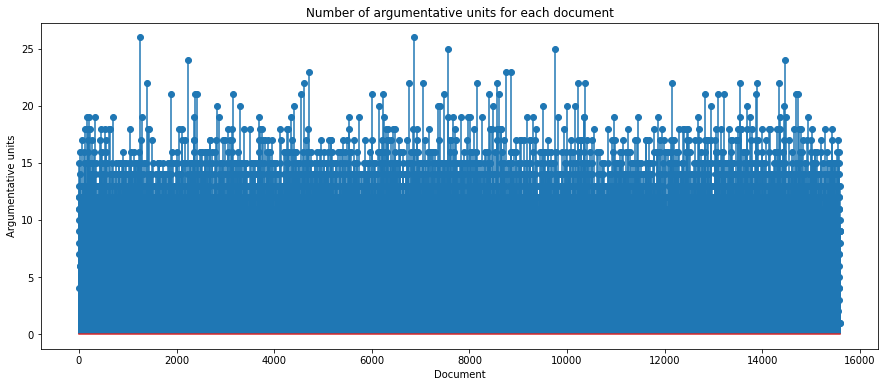

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/cloned-repo/input/feedback-prize-2021/train.csv')

arg_seg = []
grouped = data.groupby(by='id')
for k, gp in grouped:
  arg_seg.append(len(gp))

# Plot the distribution of the number of argumentative unit for each document
plt.rcParams["figure.figsize"] = (15, 6)
plt.stem(arg_seg, use_line_collection=True)
plt.xlabel('Document')
plt.ylabel('Argumentative units')
plt.title('Number of argumentative units for each document')
plt.show()

arg_seg = np.array(arg_seg)


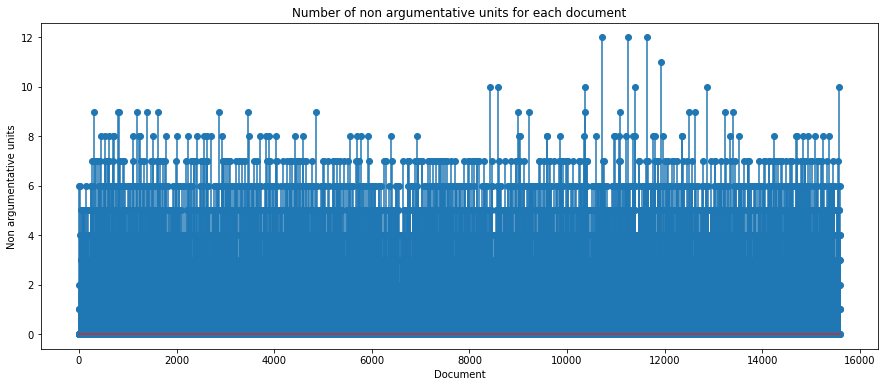

In [58]:

grouped = data.groupby(by='id')
non_arg = np.zeros(len(grouped))
j = 0
for k, gp in grouped:
  j += 1
  for i in range(len(gp)-1):
    pred_str1 = gp['predictionstring'].iloc[i].split()
    pred_str2 = gp['predictionstring'].iloc[i+1].split()
    start = int(pred_str1[-1])
    end = int(pred_str2[0])
    if start + 1 != end :
      non_arg[j] += 1

plt.rcParams["figure.figsize"] = (15, 6)
plt.stem(non_arg, use_line_collection=True)
plt.xlabel('Document')
plt.ylabel('Non argumentative units')
plt.title('Number of non argumentative units for each document')
plt.show()

The maximum number of units for document is : 31.
It will be the number of queries in the model.


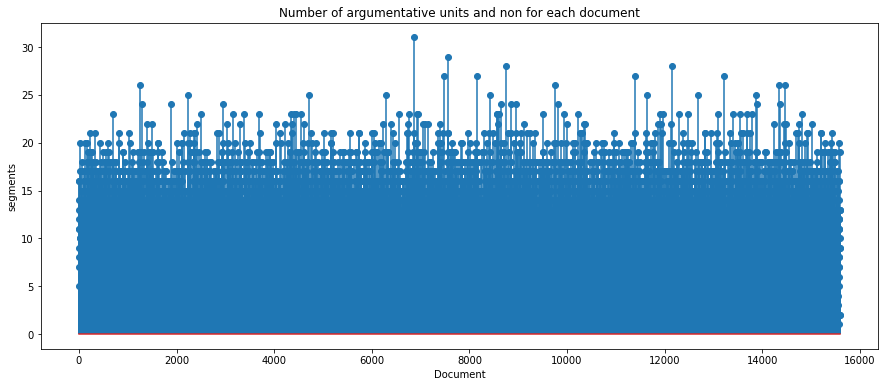

In [59]:
seg = non_arg + arg_seg
max_seg = np.max(seg)
print('The maximum number of units for document is : {}.\nIt will be the number of queries in the model.'.format(int(max_seg)))

plt.rcParams["figure.figsize"] = (15, 6)
plt.stem(seg, use_line_collection=True)
plt.xlabel('Document')
plt.ylabel('segments')
plt.title('Number of argumentative units and non for each document')
plt.show()
